In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.cluster import KMeans


/home/gabrielmartins/miniconda3/envs/Aulas_AI2/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sns.set()

/home/gabrielmartins/miniconda3/envs/Aulas_AI2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv("./adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
le = preprocessing.LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])
df

X = df.drop(["income"], axis = 1)

scaler = MinMaxScaler()
scaler.fit(X)
df_scaled = scaler.transform(X)
X = pd.DataFrame(df_scaled, columns=X.columns)
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,0.500,0.145129,0.066667,0.400000,0.666667,0.500000,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95122
1,0.287671,0.500,0.052451,0.733333,0.533333,0.333333,0.357143,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95122
2,0.150685,0.250,0.219649,0.466667,0.733333,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95122
3,0.369863,0.500,0.100153,1.000000,0.600000,0.333333,0.500000,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95122
4,0.013699,0.000,0.061708,1.000000,0.600000,0.666667,0.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.500,0.165763,0.466667,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95122
48838,0.315068,0.500,0.096129,0.733333,0.533333,0.333333,0.500000,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95122
48839,0.561644,0.500,0.094462,0.733333,0.533333,1.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95122
48840,0.068493,0.500,0.128004,0.733333,0.533333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95122


In [5]:
y = df['income']
#X = df.drop(['income'], axis = 1)

In [10]:
y = df['income']
X = df.drop(['income'], axis = 1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
print('\n')
print(classification_report(y,y_kmeans))
print('\n')
print(confusion_matrix(y,y_kmeans))

[1 1 0 ... 1 1 0]


              precision    recall  f1-score   support

           0       0.77      0.26      0.39     37155
           1       0.24      0.75      0.37     11687

    accuracy                           0.38     48842
   macro avg       0.51      0.51      0.38     48842
weighted avg       0.65      0.38      0.39     48842



[[ 9802 27353]
 [ 2904  8783]]


In [10]:
from sklearn.cluster import MiniBatchKMeans
kmeans2 = MiniBatchKMeans(n_clusters=2)
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)
print(y_kmeans)
print('\n')
print(classification_report(y,y_kmeans2))
print('\n')
print(confusion_matrix(y,y_kmeans2))

[1 1 1 ... 0 1 0]


              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65     37155
         1.0       0.11      0.15      0.13     11687

    accuracy                           0.50     48842
   macro avg       0.40      0.38      0.39     48842
weighted avg       0.56      0.50      0.53     48842



[[22732 14423]
 [ 9918  1769]]


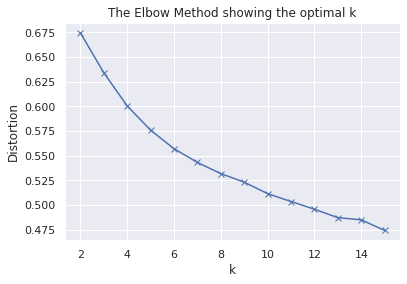

In [12]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []

K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'mahalanobis'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

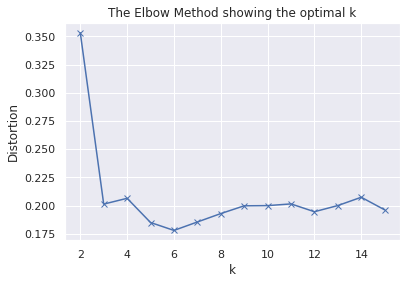

In [14]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# k means determine k
silhouette = []
K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    silhouette.append(silhouette_score(X, kmeanModel.labels_))
    
# Plot the elbow
#plt.plot(K, distortions, 'bx-')
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
# y = df['income']
# X = df.drop(["income"], axis = 1)

dbscan = DBSCAN(min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [16]:
print(dbscan.labels_)

[0 0 0 ... 1 0 1]
